<a href="https://colab.research.google.com/github/bhkwon89/Section1_project/blob/main/Section1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야 합니다  
연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야 합니다  
출고량의 높은 게임에 대한 분석 및 시각화 프로세스 가 포함되어야 합니다  

In [16]:
# 구글 드라이브 연동
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [17]:
# 여러줄 출력용 라이브러리 호출
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('vgames2.csv', index_col=0)

df.head(5)

print('\n행 갯수 = ' ,len(df))

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04



행 갯수 =  16598


In [145]:
# 결측치 확인
df.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [146]:
# 중복 값 확인
df.duplicated().sum()

1

In [147]:
# 중복 값이 있어 제거
df.drop_duplicates(inplace=True)
df = df.reset_index(drop=True)

print('\n행 갯수 = ' ,len(df))


행 갯수 =  16597


In [148]:
print('결측치 제외 게임제목 종류 = ', df['Name'].nunique())
print()
print('=========== 각 게임제목 별 개수 ========= \n', df['Name'].value_counts())

결측치 제외 게임제목 종류 =  11493

=========== 각 게임제목 별 개수 ========= 
 Need for Speed: Most Wanted            12
Ratatouille                             9
FIFA 14                                 9
LEGO Marvel Super Heroes                9
Madden NFL 07                           9
                                       ..
Road Rash 3D                            1
Saki: Achiga-Hen Portable               1
Shining Force Feather                   1
Model * Oshare Audition: Dream Girl     1
Rainbow Islands: Revolution             1
Name: Name, Length: 11493, dtype: int64


이름이 중복되는 것들이 몇개 있음

In [149]:
# 편하게 보기 위해 이름순으로 정렬

df.sort_values(by=['Name'], axis=0, inplace=True)
df = df.reset_index(drop=True)

df[df['Name'].duplicated()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
13,007: Quantum of Solace,DS,2008.0,Action,Activision,0.11,0.01,0,0.01
14,007: Quantum of Solace,PS3,2008.0,Action,Activision,0.43,0.52,0.02,0.2
15,007: Quantum of Solace,Wii,2008.0,Action,Activision,0.3,0.29,0.01M,0.07
16,007: Quantum of Solace,PS2,2008.0,Action,Activision,0.17,0,0,0.26
17,007: Quantum of Solace,X360,2008.0,Action,Activision,0.82,0.52,0.01,0.14
...,...,...,...,...,...,...,...,...,...
16584,pro evolution soccer 2011,PC,2010.0,Sports,Konami Digital Entertainment,0,0.05,0,0.01
16585,pro evolution soccer 2011,X360,2010.0,Sports,Konami Digital Entertainment,0.09,0.44,0,0.07
16586,pro evolution soccer 2011,Wii,2010.0,Sports,Konami Digital Entertainment,0.08,0.1,0.03,0.02
16587,pro evolution soccer 2011,PS2,2010.0,Sports,Konami Digital Entertainment,0.04,0.21,0.05,0.11


In [150]:
# 같은 게임이더라도 플랫폼이 다를 수 있으니 이름이 중복인 것은 문제가 없음.

# 가정
1. **이름이 같으면 장르는 똑같다**  
2. **플랫폼이 다르면 퍼블리셔도 다를 수 있다**
3. **이름이 같아도 플랫폼에 따라 출시연도가 다를 수 있다**

가정 1을 통해 a 행, b 행의 이름이 같은데 a 행에는 장르가 nan이고 b행에는 장르가 존재할 때 a행의 장르를 b행의 장르로 채울 수 있다    


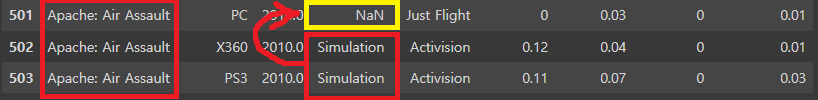


In [151]:

print('결측치 제외 장르의 종류 = ', df['Genre'].nunique())
print()
print('=========== 각 장르별 제품 개수 ========= \n', df['Genre'].value_counts())


결측치 제외 장르의 종류 =  12

=========== 각 장르별 제품 개수 ========= 
 Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1307
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Name: Genre, dtype: int64


In [152]:
df[df['Name'] == 'Apache: Air Assault'	]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
501,Apache: Air Assault,PC,2010.0,NaN,Just Flight,0,0.03,0,0.01
502,Apache: Air Assault,X360,2010.0,Simulation,Activision,0.12,0.04,0,0.01
503,Apache: Air Assault,PS3,2010.0,Simulation,Activision,0.11,0.07,0,0.03


In [155]:
# 장르가 null인 게임 중에 같은 이름을 같는 행이 있는지 확인
genre_null = df[df['Genre'].isna()]['Name']


# 장르가 null인 게임만 모아둔 dataframe
df_genre_null = pd.DataFrame(genre_null )


dup_cnt = []
for name in df[df['Genre'].isna()]['Name']:
  dup_cnt.append(df[df['Name'] == name]['Name'].count())

df_genre_null['dup_cnt'] = dup_cnt
df_genre_null['Genre'] = ''



for idx, row in df_genre_null.iterrows():
  if row.dup_cnt > 1:
    for Genre in df[df['Name'] == row.Name]['Genre']:                            # 장르가 null인 게임 중 같은 이름인 행을 찾음
      if Genre in df['Genre'].unique():                                          # 찾은 행의 장르가 Null이 아닐 경우 저장 ( == 찾은 행의 장르가 unique 값 중 하나 일 경우)
        df_genre_null.loc[df_genre_null['Name'] == row.Name, 'Genre'] = Genre   
        break
  

#print(df_genre_null['Name'])

for i in range(len(df)):
  
  if not(pd.isnull(df.loc[i,'Genre'])) :
    continue



  #df_genre_null[df_genre_null['Name'] == df.loc[i, 'Name']]['Genre']
  
  #print(df.loc[i,'Name'], df.loc[i,'Genre'], df_genre_null[df_genre_null['Name'] == df.loc[i, 'Name']]['Genre'].values.tolist()[0])
  if df_genre_null[df_genre_null['Name'] == df.loc[i, 'Name']]['Genre'].values.tolist()[0] != '':
    df.loc[i,'Genre'] = df_genre_null[df_genre_null['Name'] == df.loc[i, 'Name']]['Genre'].values.tolist()[0]
    #print(df_genre_null[df_genre_null['Name'] == df.loc[i, 'Name']]['Genre'].values.tolist()[0] )
    #pass

df.isna().sum()

Name             0
Platform         0
Year           270
Genre           30
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [154]:
# 위의 방식으로 채운 결과 50 -> 30으로 결측값이 줄음, 아래는 확인용
df[df['Name'] == 'Apache: Air Assault'	]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
501,Apache: Air Assault,PC,2010.0,Simulation,Just Flight,0,0.03,0,0.01
502,Apache: Air Assault,X360,2010.0,Simulation,Activision,0.12,0.04,0,0.01
503,Apache: Air Assault,PS3,2010.0,Simulation,Activision,0.11,0.07,0,0.03


In [156]:
# 장르 종류는 결측치 제외 총 12개
# 장르의 결측치는 총 50개로 

print('출시연도 개수 = ', df['Year'].nunique())
print()
print('=========== 각 출시연도별 제품 개수 ========= \n', df['Year'].value_counts())
print()
print('======== 출시연도 =======  \n',df['Year'].value_counts().index)

출시연도 개수 =  62

=========== 각 출시연도별 제품 개수 ========= 
 2009.0    1421
2008.0    1418
2010.0    1252
2007.0    1199
2011.0    1129
          ... 
97.0         2
13.0         2
2020.0       1
86.0         1
94.0         1
Name: Year, Length: 62, dtype: int64

======== 출시연도 =======  
 Float64Index([2009.0, 2008.0, 2010.0, 2007.0, 2011.0, 2006.0, 2005.0, 2002.0,
              2003.0, 2004.0, 2012.0, 2015.0, 2014.0, 2013.0, 2001.0, 1998.0,
              2000.0, 2016.0, 1999.0, 1997.0, 1996.0, 1995.0, 1994.0, 1993.0,
              1981.0, 1992.0, 1991.0, 1982.0, 1986.0, 1983.0, 1989.0, 1987.0,
              1990.0, 1988.0, 1985.0, 1984.0,   11.0,    8.0,    9.0, 1980.0,
                 3.0,    6.0,   10.0,   15.0,   16.0,    5.0,    4.0,   95.0,
                 7.0, 2017.0,   96.0,    2.0,   98.0,    0.0,   14.0,    1.0,
                12.0,   97.0,   13.0, 2020.0,   86.0,   94.0],
             dtype='float64')


출시연도에 2자리만 넣은 경우가 있어 4자리로 변경

In [157]:
for i in range(len(df)):
  if df['Year'][i] / 1900 < 1:
    if df['Year'][i] / 80.0  > 1:
      df['Year'][i] = df['Year'][i] + 1900
    else:
      df['Year'][i] = df['Year'][i] + 2000

print('출시연도 개수 = ', df['Year'].nunique())
print()
print('=========== 각 출시연도별 제품 개수 ========= \n', df['Year'].value_counts())
print()
print('======== 출시연도 =======  \n',df['Year'].value_counts().index)

출시연도 개수 =  39

=========== 각 출시연도별 제품 개수 ========= 
 2009.0    1431
2008.0    1428
2010.0    1259
2007.0    1202
2011.0    1139
2006.0    1008
2005.0     941
2002.0     829
2003.0     775
2004.0     763
2012.0     657
2015.0     614
2014.0     582
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     344
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1987.0      16
1990.0      16
1988.0      15
1984.0      14
1985.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

======== 출시연도 =======  
 Float64Index([2009.0, 2008.0, 2010.0, 2007.0, 2011.0, 2006.0, 2005.0, 2002.0,
              2003.0, 2004.0, 2012.0, 2015.0, 2014.0, 2013.0, 2001.0, 1998.0,
              2000.0, 2016.0, 1999.0, 1997.0, 1996.0, 1995.0, 1994.0, 1993.0,
              1981.0, 1992.0, 1991.0, 1982.0, 1986.0, 1983.0, 1989.0, 1987.0,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:


df[df['Name'].str.contains('Yu-Gi-Oh') ]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
12300,Shonen Jump's Yu-Gi-Oh! GX Card Almanac,DS,NaN,Misc,Konami Digital Entertainment,0,0,0.02,0
16406,Yu-Gi-Oh! 5D's Stardust Accelerator: World Cha...,DS,2009.0,Action,Konami Digital Entertainment,0.27,0.01,0.09,0.03
16407,Yu-Gi-Oh! 5D's Tag Force 4,PSP,2009.0,Strategy,Konami Digital Entertainment,0.19,0.07,0.12,0.06
16408,Yu-Gi-Oh! 5D's Tag Force 5,PSP,2010.0,Strategy,Konami Digital Entertainment,0.13,0.05,0.14,0.03
16409,Yu-Gi-Oh! 5D's Tag Force 6,PSP,2011.0,Strategy,Konami Digital Entertainment,0,0,0.16,0
16410,Yu-Gi-Oh! 5D's Wheelie Breakers,Wii,2009.0,Racing,Konami Digital Entertainment,0.09,0.01,0,0.01
16411,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
16412,Yu-Gi-Oh! 5D's World Championship 2010 Reverse...,DS,2010.0,Strategy,Konami Digital Entertainment,0.18,0.02,0.09,0.02
16413,Yu-Gi-Oh! 5D's World Championship 2011: Over t...,DS,2011.0,Strategy,Konami Digital Entertainment,0.1,0.03,0.07,0.01
16414,Yu-Gi-Oh! 5D's: Duel Transer,Wii,2010.0,Strategy,Konami Digital Entertainment,0.11,0.02,0.02,0.01


In [ ]:
df[df['Publisher'] == 'Unknown'].count()

In [ ]:
df[df['Publisher'].isna()]